With this notebook you can answer:
- What is the demographics of the customer base?
- When is demand highest?
- Which users are most profitable?
- Which cities should marketing focus on?
- Does surge pricing increase churn?
- Does trip distance and time increase price?
- What drives tipping behaviour?
- How steady is our customer base in terms of churning?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.width", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported. Ready!")

Libraries imported. Ready!


In [2]:
DATA_PATH = "../data/riders_trips_sessions.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
display(df.head(5))

Dataset shape: (10000, 28)


,user_id,signup_date,loyalty_status,age,city,avg_rating_given,churn_prob,referred_by,total_trips,total_spent,avg_fare,total_tip,avg_tip,avg_surge,last_trip_time,first_trip_time,weekend_trip_ratio,peak_hour_trip_ratio,total_sessions,total_time_on_app,avg_time_on_app,total_pages_visited,avg_pages_visited,conversion_rate,last_session_time,first_session_time,weekend_session_ratio,peak_hour_session_ratio
0,R00000,2025-01-24,Bronze,34.73,Nairobi,5.00,0.14,R00001,25,366.05,14.64,4.03,0.16,1.10,2025-04-02 14:46:29+00:00,2024-05-01 07:21:52+00:00,0.16,0.16,4.00,368.00,92.00,12.00,3.00,0.25,2025-04-27 16:06:46+00:00,2025-04-27 00:49:27+00:00,1.00,0.00
1,R00001,2024-09-09,Bronze,34.57,Nairobi,4.70,0.67,NaN,14,180.53,12.89,0.76,0.05,1.07,2025-04-22 04:35:17+00:00,2024-05-10 18:14:41+00:00,0.29,0.07,3.00,524.00,174.67,8.00,2.67,0.00,2025-04-27 10:33:25+00:00,2025-04-27 07:10:07+00:00,1.00,1.00
2,R00002,2024-09-07,Bronze,47.13,Lagos,4.20,0.51,NaN,24,378.99,15.79,5.21,0.22,1.19,2025-04-13 00:08:00+00:00,2024-06-18 17:48:24+00:00,0.12,0.17,3.00,573.00,191.00,9.00,3.00,0.00,2025-04-27 15:04:35+00:00,2025-04-27 07:32:20+00:00,1.00,0.67
3,R00003,2025-03-17,Bronze,41.66,Nairobi,4.90,0.24,NaN,9,121.47,13.50,0.87,0.10,1.16,2025-02-25 04:22:32+00:00,2024-05-15 05:13:12+00:00,0.33,0.11,3.00,226.00,75.33,5.00,1.67,0.00,2025-04-27 09:56:39+00:00,2025-04-26 23:28:16+00:00,1.00,0.33
4,R00004,2024-08-20,Silver,40.68,Lagos,3.90,0.27,R00002,16,268.43,16.78,9.38,0.59,1.26,2025-04-15 05:30:04+00:00,2024-05-23 13:02:45+00:00,0.44,0.19,2.00,34.00,17.00,5.00,2.50,0.00,2025-04-27 18:28:35+00:00,2025-04-27 06:25:27+00:00,1.00,0.00


## Demographics

#### Summary Statistics of Customer Age

In [3]:
# Summary Stats
df['age'].describe()

count   10000.00
mean       35.15
std         9.55
min        18.00
25%        28.32
50%        35.04
75%        41.69
max        70.00
Name: age, dtype: float64

### Age Distribution

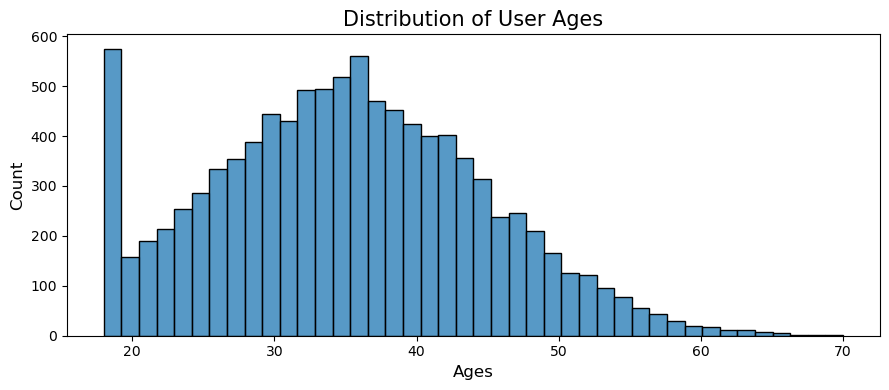

In [4]:
# Plotting the age distribution
plt.figure(figsize=(9,4))
sns.histplot(data=df, x=df['age'],)
plt.title('Distribution of User Ages', fontsize=15, )
plt.xlabel(xlabel='Ages', fontsize=12, )
plt.ylabel('Count', fontsize=12, )
plt.tight_layout()
plt.show();

#### Insights from Age Distribution

- The most common age amoung our users is 18 years.
- Hoever, majority of users are concentrated in the age range of approximately 25 to 45 years old.
- The distribution appears to be roughly normal, with a peak around the mid-30s.
- The minimum age is 18 and the maximum age is 70, indicating a broad user base, but with a clear focus on younger to middle-aged adults.

### City

In [5]:
df['city'].value_counts()

city
Cairo      3374
Nairobi    3330
Lagos      3296
Name: count, dtype: int64

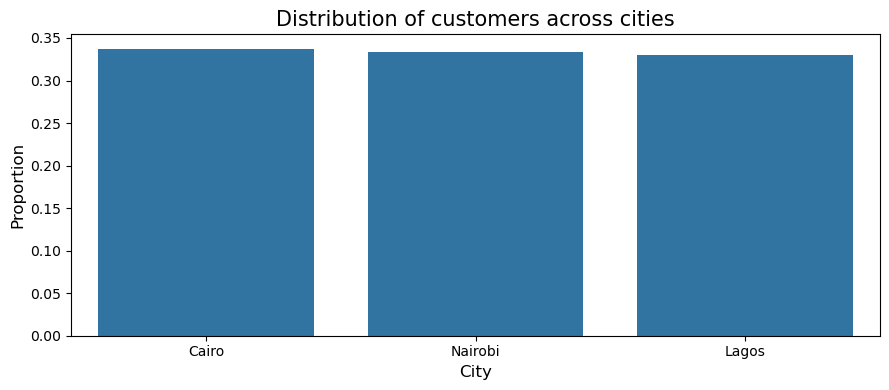

In [6]:
city = df['city'].value_counts(normalize=True).reset_index()
city.columns = ['city', 'proportion']

plt.figure(figsize=(9, 4))
sns.barplot(data=city, x='city', y='proportion')
plt.title('Distribution of customers across cities', fontsize=15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from City

- The customer base is almost evenly distributed across the three cities: Cairo, Nairobi, and Lagos.
- Cairo has the largest proportion of customers (approximately 34%), followed closely by Nairobi (around 33%).
Lagos has the smallest proportion, but is still very close to the other two cities (around 33%).
- This indicates a relatively balanced market presence across these key urban centers, suggesting that marketing and operational efforts might need to be tailored slightly to each city's specific customer base, but no single city overwhelmingly dominates the user population.

### Loyalty Status

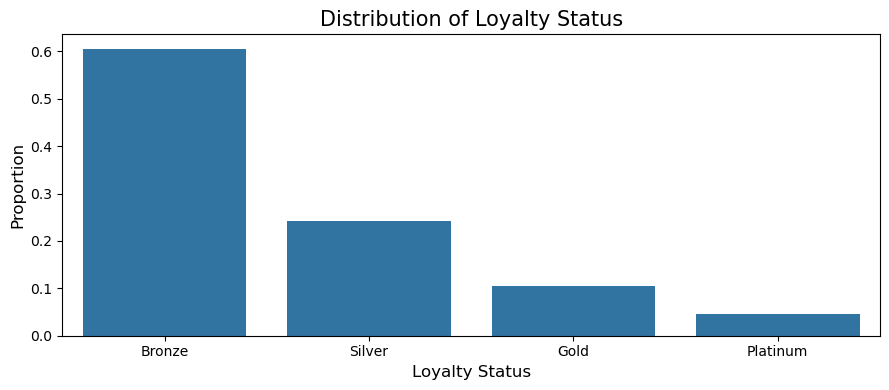

In [7]:
loyalty_stats = df['loyalty_status'].value_counts(normalize=True).reset_index()
loyalty_stats.columns = ['loyalty_status', 'proportion']

plt.figure(figsize=(9, 4))
sns.barplot(data=loyalty_stats, x='loyalty_status', y='proportion')
plt.title('Distribution of Loyalty Status', fontsize=15)
plt.xlabel('Loyalty Status', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from Loyalty Status

- The largest customer segment is 'Bronze,' making up  approximately 61% of the total customer base, indicating a significant number of new or infrequent users.

- 'Silver' members constitute about 24% of customers, and 'Gold' members represent approximately 11%, together forming a substantial portion of engaged users who have progressed beyond the basic tier.

- The 'Platinum' loyalty status is the smallest tier, comprising only about 5% of customers, suggesting an exclusive group of the most loyal and high-value customers.

## Temporal Analysis

### Time Series Analysis

In [8]:
monthly_yearly_trips = df.groupby('pickup_time_month_year')['trip_id'].count().reset_index()

# monthly_yearly_trips['sort_key'] = pd.to_datetime(monthly_yearly_trips['pickup_time_month_year'], format='%m-%y')
monthly_yearly_trips['sort_key'] = pd.to_datetime(monthly_yearly_trips['pickup_time_month_year'], format='%b %Y')
monthly_yearly_trips = monthly_yearly_trips.sort_values(by='sort_key').drop(columns='sort_key')
monthly_yearly_trips.head()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_yearly_trips, x='pickup_time_month_year', y='trip_id', marker='o')
plt.title('Trips by Month-Year', fontsize=15)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


KeyError: 'pickup_time_month_year'

#### Insights from Time Series:
- The plot shows a clear trend of increasing trip numbers from April 2024, reaching a peak around August 2024, and then stabilizing with some fluctuations.
- From December 2024 to January 2025, there's a slight increase in trips, followed by a dip in February 2025.
- The data indicates a generally upward trend in demand over the observed period, suggesting growth in the service.
- Seasonal patterns are not distinctly clear yet due to limited data points for a full year cycle, but the peak in mid-year 2024 suggests higher demand during those months. More data over a longer period would be needed to confirm clear annual seasonality.

Next Steps

The observed peak in mid-2024 suggests potential higher demand during specific months, but more data over a longer period is needed to confirm clear annual seasonality.
Investigate the factors contributing to the dip in February 2025, and the overall growth trend to understand the drivers of demand and potential areas for operational improvements.

### Trips by Hour

In [ ]:
plt.figure(figsize=(8, 5))
hourly_trips = df.groupby('pickup_hour')['trip_id'].count()
hourly_trips.plot(kind='bar', title="Trips by Hour")
plt.xlabel(xlabel='Pickup Hour', fontsize=12, )
plt.ylabel('Count', fontsize=12, )
plt.xticks(rotation=0)
plt.show()

#### Insights from Hourly Trips:
-   There are two distinct peaks in trip activity: one in the morning (around 6-7 AM) and another in the afternoon/evening (around 4-5 PM). These likely correspond to morning and evening commute times.
-   Demand is lowest during the very late night/early morning hours, specifically between 0 AM and 2 AM.
-   There is a noticeable dip in trip activity during the mid-day period (roughly 9 AM to 2 PM) after the morning peak, before it rises again towards the evening peak.

#### Business Implications
- These hours are mission-critical revenue windows.
- Any driver shortages here cause:
  - Longer ETAs
  - Cancellations
  - Customer frustration → churn risk
- The company should prioritise drivers supply stability over aggressive surge during these time windows.

### Trips by Time of Day

In [ ]:
plt.figure(figsize=(8, 5))
df['time_of_day'].value_counts().plot(kind='bar')
plt.title("Trips by Time of Day")
plt.xlabel(xlabel='Time of Day', fontsize=12, )
plt.ylabel('Count', fontsize=12, )
plt.xticks(rotation=0)
plt.show()

#### Insights from Trips by Time of Day:
- **Afternoon Dominance:** The 'Afternoon' period (typically 12 PM to 5 PM) exhibits the highest number of trips, suggesting it is the busiest time for the service.
- **Morning Activity:** 'Morning' (typically 6 AM to 12 PM) follows closely, indicating strong demand during the start of the day and commute hours.
- **Evening Demand:** 'Evening' (typically 5 PM to 9 PM) also shows considerable activity, though slightly less than morning and afternoon, likely reflecting post-work and leisure travel.
- **Late Night Decline:** 'Late Night' (typically 9 PM to 6 AM) has the lowest number of trips, which is typical for ride-hailing services during off-peak hours.

### Trips by Month

In [ ]:
plt.figure(figsize=(8, 5))
df.groupby('pickup_time_month')['trip_id'].count().plot(kind='line', marker='o')
plt.title("Trips by Month")
plt.xlabel(xlabel='Pickup Month', fontsize=12, )
plt.ylabel('Count', fontsize=12, )
plt.xticks(rotation=0)
plt.show()

#### Insights from Trips by Month:
- The highest number of trips appears to be around **month 8 (August)**, indicating a summer peak.
- The lowest number of trips seems to occur in the **earlier months (February)** and possibly towards the **end of the year (November)**.
- This seasonality suggests that demand is likely influenced by weather conditions, holidays, or other events that are more prevalent in certain times of the year.

### Trips by Day

In [ ]:
trips_day = df.groupby('pickup_time_day')['trip_id'].count()
trips_day_df = trips_day.reset_index()
trips_day_df.columns = ['Day of the week', 'Count']

# Sort values if desired
trips_day_df = trips_day_df.sort_values(by='Count', ascending=False)
print(trips_day_df)

# Plotting using the DataFrame
plt.figure(figsize=(8, 5))
trips_day_df.plot(kind='bar', x='Day of the week', y='Count')
plt.title("Trips by Day")
plt.xlabel(xlabel='Pickup Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

#### Insights from Trips by Day:
- **Highest Demand:** Sunday records the highest number of trips with 29,012.
- **Lowest Demand:** Thursday has the lowest number of trips with 28,315.
- **Weekend vs. Weekday:** Weekend days (Saturday with 28,731 trips and Sunday with 29,012 trips) show a generally higher demand compared to weekdays.
- **Weekday Consistency:** Weekday demand is relatively consistent, ranging from 28,315 to 28,567 trips, with Tuesday and Friday slightly higher than Monday, Wednesday, and Thursday.

### Weekday vs Weekend Engagement

In [ ]:
df.groupby('pickup_is_weekend')['trip_id'].count().plot(kind='bar')
plt.title("Weekend vs Weekday Trips")
plt.xlabel(xlabel='', fontsize=12, )
plt.ylabel('Count', fontsize=12, )
plt.xticks([0, 1],labels=['Weekday', 'Weekend'], rotation=0)
plt.show()

#### Insights from Weekday vs Weekend Engagement:
- **Overall Demand:** The majority of trips occur during weekdays, with a total of approximately 142,257 trips, while weekends account for approximately 57,743 trips.
- **Weekday Consistency:** Demand during weekdays is relatively consistent across Monday, Tuesday, Wednesday, Thursday, and Friday, as observed in the 'Trips by Day' analysis.
- **Weekend Surge:** Weekend days, particularly Sunday and Saturday, show individually higher trip counts compared to individual weekdays, indicating a noticeable surge in demand during the weekend.
- **Operational Implications:** The distribution suggests that while the overall volume is higher during the weekdays, the weekend still represents a significant portion of demand. This implies the need for balanced operational staffing and resource allocation across both periods, with potential for optimized strategies during peak weekend hours.

## Revenue & Pricing Analysis

In [ ]:
df[['fare','total_fare','total_fare_with_tip']].describe()

### Fare Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['total_fare'], bins=50)
plt.title("Fare Distribution")
plt.xlabel('Total Fare', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from Fare Distribution:
- The distribution of total fares is right-skewed, indicating that the majority of trips have lower fares, with a long tail extending towards higher fares.
- A significant concentration of trips falls within the lower fare ranges, likely representing common short-distance trips.
- There are fewer trips with very high fares, which could correspond to longer distances, surge pricing, or specific premium services.
- This distribution suggests that while most revenue comes from frequent, lower-fare trips, there's also a segment of high-value trips contributing to the overall revenue.

### Tip Distribution

In [ ]:
df['tip_percentage'].describe()

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['tip_percentage'], bins=30)
plt.title("Tip Percentage Distribution")
plt.xlabel('Tip Percentage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from Tip Percentage Distribution:
- **High Concentration at Zero:** A very large number of trips have a tip percentage of 0%, indicating that tipping is not universal.
- **Right-Skewed Distribution:** For trips where a tip is given, the distribution is heavily right-skewed, with most tips being small percentages.
- **Few High Tippers:** There are relatively few instances of very high tip percentages (e.g., above 10-15%). The bulk of the tipping behavior is concentrated in lower single-digit percentages.
- **Implications:** This suggests that while some customers tip, it's not a prevalent behavior across all trips, and when customers do tip, they generally opt for smaller percentages.

### Revenue Segmentation (Fare Buckets)

In [ ]:
revenue_seg = df['total_fare_bucket'].value_counts(normalize=True).reset_index()
revenue_seg.columns = ['segments', 'count']

plt.figure(figsize=(9,4))
sns.barplot(data=revenue_seg, x='segments', y='count')
plt.title('Distribution of customers across revenue segments', fontsize=15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from Revenue Segmentation:
- **Even Distribution:** The customer base is almost evenly distributed across all four revenue segments: 'low', 'medium', 'high', and 'very_high'. Each segment accounts for approximately 25% of the total.
- **Balanced Revenue Contribution:** This balanced distribution suggests that revenue is not overly concentrated in one segment, indicating a healthy mix of customer spending habits.
- **Strategic Implications:** This segmentation can be valuable for tailoring marketing and retention strategies. For instance, 'low' and 'medium' segments could be targeted with promotions to increase their spending, while 'high' and 'very_high' segments could be offered exclusive services or loyalty rewards to maintain their value.

## Payment & Tipping Behavior Analysis

### Payment Type

In [ ]:
df['payment_type'].value_counts(normalize=True)

In [ ]:
payment_type = df['payment_type'].value_counts(normalize=True).reset_index()
payment_type.columns = ['payment_type', 'proportion']

plt.figure(figsize=(9, 4))
sns.barplot(data=payment_type, x='payment_type', y='proportion')
plt.title('Distribution of Payment Type preferred by Customers', fontsize=15)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from Distribution of Payment Type:
- **Card Dominance:** Card payments are the most preferred method, accounting for approximately 50% of all transactions.
- **Mobile Money Popularity:** Mobile Money is the second most popular payment option, making up about 40% of payments.
- **Cash as a Minority:** Cash payments are the least common, representing around 10% of transactions.
- **Implications:** This distribution suggests a strong preference for digital payment methods (Card and Mobile Money) among customers, with cash being a significantly less utilized option.

### Average Fare by Payment Type

In [ ]:
payment_type = df.groupby('payment_type')['total_fare'].mean()
payment_type.plot(kind='bar', title="Average Fare by Payment Type")
plt.xlabel(xlabel='Payment Type', fontsize=12, )
plt.ylabel('Average Fare', fontsize=12, )
plt.xticks(rotation=0)
plt.show()

#### Insights from Average Fare by Payment Type:
- The average fare is remarkably consistent across all payment types: Card ($18.46), Mobile Money ($18.47), and Cash ($18.42).
- This indicates that the choice of payment method does not significantly influence the total fare amount of a trip.
- The pricing structure or trip characteristics (like distance or duration) that determine the fare are applied uniformly regardless of how the customer chooses to pay.

## Churn & Retention Analysis

### Churn Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['churn_prob'], bins=30)
plt.title("Churn Probability Distribution")
plt.xlabel('Churn Probability', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from Churn Probability Distribution:
- The distribution of churn probabilities is concentrated at lower values, indicating that a significant portion of users have a low probability of churning.
- There is a noticeable peak around the lower churn probability range, suggesting a stable user base.
- The distribution appears to be right-skewed, with fewer users having very high churn probabilities.
- This indicates that while there are some users at high risk of churning, the majority of the customer base is relatively secure.

### Churn by Segments

In [ ]:
df.groupby('loyalty_status')['churn_prob'].mean()

In [ ]:
df.groupby('city')['churn_prob'].mean().sort_values(ascending=False).head(10)

In [ ]:
df.groupby('pickup_is_peak_hour')['churn_prob'].mean()

## Correlation Analysis

### Correlation between Surge Multiplier & Fare

In [ ]:
# explore the correlation by using the corr matrix

surge_fare = df[['surge_multiplier', 'total_fare',]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(surge_fare, cmap='coolwarm', annot=True)
plt.title("Correlation between Surge Multiplier and Total Fare")
plt.show()

#### Visualizing the correlation

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='surge_multiplier', y='total_fare')
plt.title("Surge Multiplier vs Fare", fontsize=15)
plt.xlabel('Surge Multiplier', fontsize=12)
plt.ylabel('Total Fare', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from Surge Multiplier & Fare:
- **Strong Positive Correlation:** The correlation matrix and scatter plot clearly indicate a strong positive correlation (0.82) between `surge_multiplier` and `total_fare`. This means that as the surge multiplier increases, the total fare also tends to increase significantly.
**Expected Behavior:** This relationship is expected, as surge pricing is designed to increase fares during periods of high demand to balance supply and demand.
- **Impact on Pricing:** The surge multiplier is a major determinant of the total fare, demonstrating its effectiveness in influencing pricing. This is a critical factor for revenue generation and driver incentives during peak hours or challenging conditions.

### Correlation between Total Fare & Trip Distance

In [ ]:
# explore the correlation by using the corr matrix
trip_distance_duration = df[['trip_distance_km','trip_duration_min',]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(trip_distance_duration, cmap='coolwarm', annot=True)
plt.title("Correlation between Surge Multiplier and Total Fare")
plt.show()

#### Visualizing the correlation

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='trip_distance_km', y='total_fare')
plt.title(" Total Fare vs Trip Distance", fontsize=15)
plt.ylabel('Total Fare ($)', fontsize=12)
plt.xlabel('Trip Distance (km)', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from Total Fare vs Trip Distance:
- The scatter plot shows a very weak or no linear relationship between `total_fare` and `trip_distance_km`.
- This is consistent with the correlation coefficient previously calculated, which was close to zero (-0.00).
- The data points are widely scattered, indicating that trips with similar distances can have vastly different total fares, and vice versa.
- This suggests that factors other than just distance, such as `surge_multiplier`, `time_of_day`, or `weather` might be more significant drivers of the total fare.

### Correlation between Total Fare & Trip Duration

In [ ]:
trip_fare_duration = df[['trip_duration_min','fare']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(trip_distance_duration, cmap='coolwarm', annot=True)
plt.title("Correlation between Surge Multiplier and Total Fare")
plt.show()



#### Visualizing the correlation



In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='trip_duration_min', y='total_fare')
plt.title(" Total Fare vs Trip Duration", fontsize=15)
plt.ylabel('Total Fare ($)', fontsize=12)
plt.xlabel('Trip Duration (mins)', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights from Total Fare vs Trip Duration:

- Similar to trip distance, the scatter plot for `total_fare` vs `trip_duration_min` shows a very weak or no linear relationship.
- Trips of similar duration can have vastly different fares.

#### Business Implications
- Customers cannot intuitively predict price based on time alone.
- Perceived pricing inconsistentcy can:
  - Reduce trust
  - Increase price complaints
  - Increase churn risk
- Customers value predictable pricing more than optimised pricing.
- Lack of pricing transparency may become a competitive disadvantage.
- Price shocks are a known churn trigger. Users will churn because prices feel unfair or unpredictable. 

### Overall Correlations

In [ ]:
num_cols = df.select_dtypes(include=np.number)
num_cols_for_overview = num_cols[['age', 'avg_rating_given', 'churn_prob', 'fare', 'surge_multiplier', 'tip', 'trip_duration_min', 'trip_distance_km', 'total_fare', 'total_fare_with_tip', 'tip_percentage']]

plt.figure(figsize=(12,8))
sns.heatmap(num_cols_for_overview.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## Outlier Detection using Box Plots

In [ ]:
num_numerical_cols = num_cols_for_overview.shape[1]
num_cols_per_row = 4
num_rows = (num_numerical_cols + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(num_cols_per_row * 4, num_rows * 3))

for i, column in enumerate(num_cols_for_overview.columns):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(y=num_cols_for_overview[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

From these plots, we can observe the following regarding outliers:
- Age: The age distribution appears slightly skewed to the right, with some outliers on the higher end, indicating a few older users.
- Average Rating Given: This distribution is extremely skewed to the left, with a lot of outliers at the low end of the boxplot, indicating a high number of high rating.
- Trip Duration, Trip Distance: The distribution is relatively normal with a majority of the data being concentrated in the middle of the plot. This indicates that most trips are around the same duration and distance. The absence of outliers indicates that there was no trip that was exceeding above the others.
- Fare, total_fare, total_fare_with_tip: These features show significant right-skewness with a large number of outliers on the higher end. This suggests that while most trips involve lower fares. There are a considerable number of trips with unusually high values.
- Surge Multiplier, Tip Percentage: These also exhibit a right-skewed distribution with many outliers, indicating that while most trips don't have high surge multipliers or tips, a segment of trips does.
- Churn Probability: This feature shows some outliers on both lower and higher ends, suggesting variations in churn probability among users.

In general, most of the numerical features in the dataset contain a substantial number of outliers, especially on the higher side. These outliers are likely genuine data points representing exceptional trips (e.g., very long distances, high fares, high surge, or significant tips) rather than data entry errors.

###### Next Steps
Further analysis would involve performing an RFM analysis on the data to segment for customers into clusters.

## Data Storytelling on the overall health of the business

Demand is  Predictable — but Pricing is Not

The time-of-day analysis shows highly predictable demand patterns, with strong peaks during morning and evening commute hours. This indicates:
- A reliable, repeatable use case (commuting).
- A stable daily demand cycle that the business understands well.

However, the pricing analysis tells a different story. The analysis of Trip Fare, Trip Distance and Trip Duration showed no meaningful relationship, meaning:
- Customers cannot infer price from trip length or time.
- Pricing is driven primarily by surge, and unknown external conditions, not trip effort.

Because demand spikes occur at predictable commute hours, surge pricing is most frequently applied when users are most dependent on the service. This creates a tension:
- Users rely on the platform daily.
- Surge exposure introduces price volatility.
- Similar trips can result in very different fares.

Revenue is optimised in the short term, but price shocks during essential trips increase dissatisfaction among frequent users. The business is currently not bleeding users, but it is silently losing trust among its frequent riders.